# Introdução

Essa é uma rápida introdução a tecnologia de vídeo para pessoas desenvolvedoras de software. Entretanto, queremos que esse documento seja fácil o suficiente **para qualquer pessoa aprender**. A idéia nasceu de uma [pequena oficina para pessoas interessadas em tecnologia de vídeo](https://docs.google.com/presentation/d/17Z31kEkl_NGJ0M66reqr9_uTG6tI5EDDVXpdPKVuIrs/edit#slide=id.p).

O objetivo principal do documento é introduzir alguns conceitos de vídeo digital utilizando um **vocabulário simples, elementos visuais e exemplos práticos**. Além disso, gostaríamos que esse conhecimento estivesse disponível em qualquer lugar. Por favor, fique à vontade para enviar correções, sugestões e melhorias.

## Terminologia Básica (continuação)

Uma outra propriedade que podemos perceber enquanto trabalhamos com imagens ou vídeo é a **proporção da tela** que descreve um relacionamento proporcional entre altura e largura de uma imagem ou pixel.

Quando as pessoas falam que um filme ou foto é **16x9** geralmente elas estão se referindo ao  **Display Aspect Ratio (DAR)**, entretanto nós também podemos ter diferentes formas de pixels e podemos chamar isso de **Pixel Aspect Ratio (PAR)**.

![display aspect ratio](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/DAR.png "display aspect ratio")

![pixel aspect ratio](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/PAR.png "pixel aspect ratio")

> #### DVD é DAR 4:3
> Mesmo que a resolução real de um DVD seja 704x480, a proporção é mantida em 4:3 considerando que esse filme possui PAR de 10:11 (704x10/480x11)

Finalmente, podemos definir um **vídeo** como uma **sucessão de *n* frames** no **tempo** que podemos perceber como uma outra dimensão, onde *n* é a quantidade de quadros por segundo ou frames per second (FPS).

![video](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/video.png "video")

O número de bits por segundo necessários para exibir um vídeo é sua **taxa de bits**.

> taxa de bits = largura $\times$ altura $\times$ profundidade de bits $\times$ quadros por segundo

Por exemplo, um vídeo com 30 frames por segundo, 24 bits por pixel, resolução de 480x240 necessitará de **82.944.000 bits por segundo** ou 82.944 Mbps (30x480x240x24) se não empregarmos nenhum tipo de compressão.

Quando a **taxa de bits** é quase constante, ela é chamada de taxa de bits constante (**CBR**), mas também pode variar, chamada de taxa de bits variável (**VBR**).

> Este gráfico mostra um VBR restrito que não gasta muitos bits enquanto o quadro é preto.
>
> ![constrained vbr](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/vbr.png "constrained vbr")

No início, os engenheiros criaram uma técnica para dobrar a taxa de quadros percebida de uma exibição de vídeo **sem consumir largura de banda extra**. Essa técnica é conhecida como **vídeo entrelaçado**; basicamente envia metade da tela em 1 "quadro" e a outra metade no próximo "quadro".

Hoje, as telas são renderizadas principalmente usando a **técnica de varredura progressiva**. Progressivo é uma forma de exibir, armazenar ou transmitir imagens em movimento em que todas as linhas de cada quadro são desenhadas em sequência.

![interlaced vs progressive](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/interlaced_vs_progressive.png "interlaced vs progressive")

Agora temos uma ideia de como uma **imagem** é representada digitalmente, como suas **cores** são arranjadas, quantos **bits por segundo** gastamos para mostrar um vídeo, se é constante (CBR) ou variável (VBR), com uma determinada **resolução** usando uma determinada **taxa de quadros** e muitos outros termos como entrelaçado, PAR e outros.

> #### Prática 2: Verifique as propriedades do vídeo
> Utilizando como base esse [artigo](https://thepythoncode.com/article/extract-media-metadata-in-python), extraia as informações de propriedades desse [vídeo](https://github.com/leandromoreira/digital_video_introduction/raw/master/v/small_bunny_1080p_30fps.mp4).

In [35]:
# Prativa 2 - Manipulação de vídeo
# -*- coding: utf-8 -*-
# O código acima é usado para definir o tipo de codificação do arquivo
# Ao tentar usar  FFmpeg, o Python pode não reconhecer o tipo de codificação ultilizei essa biblioteca para resolver o problema
# A biblioteca moviepy é uma biblioteca de manipulação de vídeo, ela é usada para obter as propriedades do vídeo
from moviepy.editor import VideoFileClip

# variavel que recebe o caminho do vídeo
video_path = "https://github.com/leandromoreira/digital_video_introduction/raw/master/v/small_bunny_1080p_30fps.mp4"

# Load the video
video = VideoFileClip(video_path)

# Get the video properties
duration = video.duration
fps = video.fps
width = video.size[0]
height = video.size[1]

# Print the video properties
print("Duration:", duration)
print("FPS:", fps)
print("Width:", width)
print("Height:", height)
print("Total frames:", duration * fps)
print("Total seconds:", duration)
print("Codec:", video.reader.codec_name)
print("Audio codec:", video.audio.reader.codec_name)
print("Audio sample rate:", video.audio.reader.fps)
print("Audio channels:", video.audio.reader.nchannels)
print("Audio bitrate:", video.audio.reader.bitrate)



Duration: 10.02
FPS: 30.0
Width: 1920
Height: 1080
Total frames: 300.59999999999997
Total seconds: 10.02


AttributeError: 'FFMPEG_VideoReader' object has no attribute 'codec_name'

# Remoção de redundância

Aprendemos que não é viável usar vídeo sem compressão; **um único vídeo de uma hora** em resolução de 720p com 30fps **requer 278 GB<sup>*</sup>**. Como **usar apenas algoritmos de compactação de dados sem perdas** como DEFLATE (usado em PKZIP, Gzip e PNG), **não** diminuirá suficientemente a largura de banda necessária, precisamos encontrar outras maneiras de compactar o vídeo.

> <sup>*</sup> Encontramos esse número multiplicando 1280 x 720 x 24 x 30 x 3600 (largura, altura, bits por pixel, fps e tempo em segundos)

Para fazer isso, podemos **explorar como nossa visão funciona**. Distinguimos melhor o brilho do que as cores, as **repetições no tempo**, um vídeo contém muitas imagens com poucas alterações, e as **repetições dentro da imagem**, cada quadro também contém muitas áreas usando o mesmo ou cor semelhante.

## Cores, Luminância e nossos olhos

Nossos olhos são [mais sensíveis à luminosidade do que às cores](http://vanseodesign.com/web-design/color-luminance/), você pode testar isso por si mesmo, olhe para essa imagem.

![luminance vs color](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/luminance_vs_color.png "luminance vs color")

Se você não consegue ver que as cores dos **quadrados A e B são idênticas** no lado esquerdo, tudo bem, é nosso cérebro nos enganando para **prestarmos mais atenção à luz e à escuridão do que à cor**. Há um conector, da mesma cor, no lado direito para que possamos (nosso cérebro) facilmente perceber que, na verdade, são a mesma cor.

> **Explicação simplista de como nossos olhos funcionam**
> O [olho é um órgão complexo](http://www.biologymad.com/nervoussystem/eyenotes.htm), é composto por muitas partes, mas estamos principalmente interessados nas células cones e bastonetes. O olho [contém cerca de 120 milhões de bastonetes e 6 milhões de células cones](https://en.wikipedia.org/wiki/Photoreceptor_cell).
>
> Para **simplificar bastante**, vamos tentar colocar as cores e a luminosidade na função das partes do olho. As **[células bastonetes](https://en.wikipedia.org/wiki/Rod_cell) são principalmente responsáveis pela luminosidade** enquanto as **[células cones](https://en.wikipedia.org/wiki/Cone_cell) são responsáveis pela cor**, existem três tipos de cones, cada um com um pigmento diferente, a saber: [S-cones (azul), M-cones (verde) e L-cones (vermelho)](https://upload.wikimedia.org/wikipedia/commons/1/1e/Cones_SMJ2_E.svg).
>
> Uma vez que temos muitas mais células bastonetes (luminosidade) do que células cones (cor), pode-se inferir que somos mais capazes de distinguir entre claro e escuro do que cores.
>
> ![eyes composition](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/eyes.jpg "eyes composition")
>
> **Funções de sensibilidade ao contraste**
>
> Pesquisadores da psicologia experimental e muitos outros campos desenvolveram muitas teorias sobre a visão humana. E uma delas é chamada de funções de sensibilidade ao contraste. Elas estão relacionadas ao espaço e ao tempo da luz e seu valor indica, para uma determinada intensidade de luz inicial, quanto mudança é necessária antes que um observador informe que houve uma mudança. Observe o plural da palavra "função", isso ocorre porque podemos medir as funções de sensibilidade ao contraste não apenas em preto e branco, mas também em cores. O resultado desses experimentos mostra que, na maioria dos casos, nossos olhos são mais sensíveis ao brilho do que à cor.

Uma vez que sabemos que somos mais sensíveis à **luma** (a luminosidade em uma imagem), podemos tentar explorá-la.

### Modelo de cor

Aprendemos primeiro [como funcionam as imagens coloridas](#terminologia-básica) usando o **modelo RGB** (consulte terminologia básica), mas existem outros modelos também. Na verdade, existe um modelo que separa a luminância (brilho) da crominância (cores) e é conhecido como YCbCr<sup>*</sup>.

> <sup>*</sup> existem mais modelos que fazem a mesma separação.

Este modelo de cor usa **Y** para representar o brilho e dois canais de cor **Cb** (azul cromático) e **Cr** (vermelho cromático). O [YCbCr](https://en.wikipedia.org/wiki/YCbCr) pode ser derivado do RGB e também pode ser convertido de volta para o RGB. Usando este modelo, podemos criar imagens totalmente coloridas, como podemos ver abaixo.

![ycbcr example](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/ycbcr.png "ycbcr example")

### Conversão entre YCbCr e RGB

Alguns podem argumentar, como podemos produzir todas as **cores sem usar o verde**?

Para responder a essa pergunta, vamos percorrer uma conversão de RGB para YCbCr. Usaremos os coeficientes do  **[standard BT.601](https://en.wikipedia.org/wiki/Rec._601)** recomendado pelo **[grupo ITU-R<sup>*</sup>](https://en.wikipedia.org/wiki/ITU-R)**. O primeiro passo é **calcular a luminância**, usaremos as constantes sugeridas pelo ITU e substituiremos os valores RGB.

```
Y = 0.299R + 0.587G + 0.114B
```

Uma vez que temos a luminância, podemos **separar as cores** (crominância azul e vermelha):

```
Cb = 0.564(B - Y)
Cr = 0.713(R - Y)
```

E também podemos **convertê-la de volta** e até mesmo obter o **verde usando YCbCr**.

```
R = Y + 1.402Cr
B = Y + 1.772Cb
G = Y - 0.344Cb - 0.714Cr
```

> <sup>*</sup> grupos e padrões são comuns em vídeo digital, eles geralmente definem quais são os padrões, por exemplo, [o que é 4K? qual taxa de quadros devemos usar? resolução? modelo de cores?](https://en.wikipedia.org/wiki/Rec._2020)

Geralmente, **monitores** (monitores, televisores, telas, etc.) utilizam **apenas o modelo RGB**, organizado de maneiras diferentes, veja alguns deles ampliados abaixo:

![pixel geometry](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/new_pixel_geometry.jpg "pixel geometry")

### Subamostragem Chroma

Com a imagem representada como componentes de luminância e crominância, podemos aproveitar a maior sensibilidade do sistema visual humano para a resolução de luminância em vez de crominância para remover seletivamente informações. A **subamostragem de crominância** é a técnica de codificação de imagens usando **menor resolução para crominância do que para luminância**.


![ycbcr subsampling resolutions](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/ycbcr_subsampling_resolution.png "ycbcr subsampling resolutions")


Quanto devemos reduzir a resolução de crominância? Descobriu-se que já existem alguns esquemas que descrevem como lidar com a resolução e a combinação (`cor final = Y + Cb + Cr`).

Esses esquemas são conhecidos como sistemas de subamostragem e são expressos como uma razão de 3 partes - `a:x:y` - que define a resolução de crominância em relação a um bloco `a x 2` de pixels de luminância.

 * `a` é a referência de amostragem horizontal (geralmente 4)
 * `x`  é o número de amostras de crominância na primeira linha de pixels `a` (resolução horizontal em relação a `a`)
 * `y` é o número de mudanças de amostras de crominância entre a primeira e a segunda linhas de pixels `a`.

> Uma exceção a isso existe com 4:1:0, que fornece uma única amostra de crominância dentro de cada bloco `4 x 4` de resolução de luma.

Os esquemas comuns usados em codecs modernos são: **4:4:4** (sem subsampling), **4:2:2, 4:1:1, 4:2:0, 4:1:0 e 3:1:1**.

> **YCbCr 4:2:0 merge**
>
> Aqui está um trecho de uma imagem mesclada usando YCbCr 4:2:0, observe que gastamos apenas 12 bits por pixel.
>
> ![YCbCr 4:2:0 merge](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/ycbcr_420_merge.png "YCbCr 4:2:0 merge")

Aqui está um trecho de uma imagem mesclada usando YCbCr 4:2:0, observe que gastamos apenas 12 bits por pixel.

Você pode ver a mesma imagem codificada pelos principais tipos de subsampling de croma, as imagens na primeira linha são o YCbCr final, enquanto a última linha de imagens mostra a resolução croma. É realmente uma grande vitória para uma perda tão pequena.

![chroma subsampling examples](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/chroma_subsampling_examples.jpg "chroma subsampling examples")

Anteriormente, tínhamos calculado que precisávamos de [278GB de armazenamento para manter um arquivo de vídeo com uma hora de resolução 720p e 30fps](#remoção-de-redundância). Se usarmos **YCbCr 4:2:0** podemos **cortar pela metade esse tamanho (139 GB)**<sup>*</sup>, mas ainda está longe do ideal.

> <sup>*</sup> encontramos esse valor multiplicando largura, altura, bits por pixel e fps. Anteriormente, precisávamos de 24 bits, agora precisamos apenas de 12.

<br/>

> ### Prática 3: Verificar um histograma YCbCr
> Escolha um quadro do [vídeo](https://github.com/leandromoreira/digital_video_introduction/raw/master/v/small_bunny_1080p_30fps.mp4). e visualize o histograma de todos os canais, como no exemplo a seguir.
>
> ![ycbcr color histogram](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/yuv_histogram.png "ycbcr color histogram")

### Cor, luma, luminância, revisão de vídeo gamma

Assista a este incrível vídeo explicando o que é luma e aprenda sobre luminância, gamma e cor.
[![Analog Luma - Uma história e explicação do vídeo](http://img.youtube.com/vi/Ymt47wXUDEU/0.jpg)](http://www.youtube.com/watch?v=Ymt47wXUDEU)

> ### Prática 4: Verificar a intensidade do YCbCr
> Você pode visualizar a intensidade do Y para uma determinada linha de um vídeo usando o [filtro osciloscópio do FFmpeg]((https://ffmpeg.org/ffmpeg-filters.html#oscilloscope).).
> ```bash
> ffplay -f lavfi -i 'testsrc2=size=1280x720:rate=30000/1001,format=yuv420p' -vf oscilloscope=x=0.5:y=200/720:s=1:c=1
> ```
> ![y color oscilloscope](https://raw.githubusercontent.com/leandromoreira/digital_video_introduction/master/i/ffmpeg_oscilloscope.png "y color oscilloscope")
> Obtenha o mesmo resultado utilizando Python (livre para usar qualquer biblioteca) para esse [vídeo](https://github.com/leandromoreira/digital_video_introduction/raw/master/v/small_bunny_1080p_30fps.mp4).

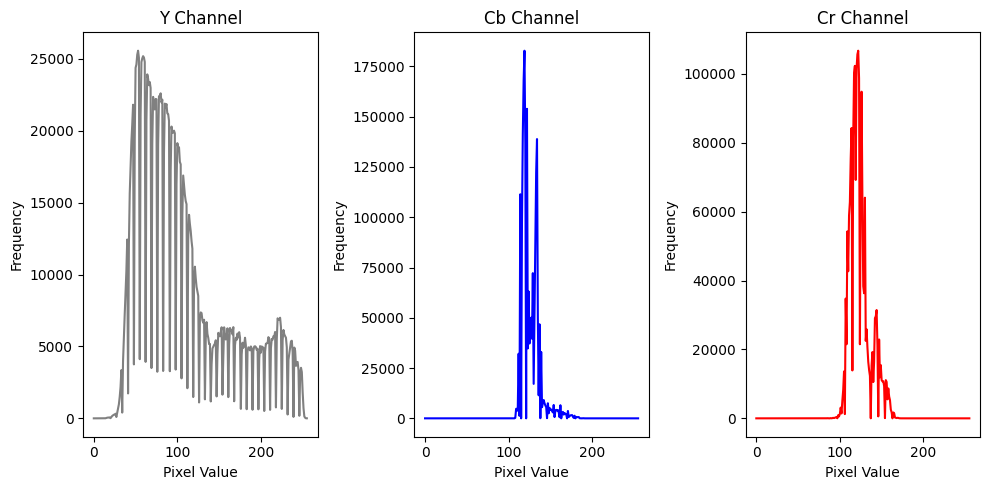

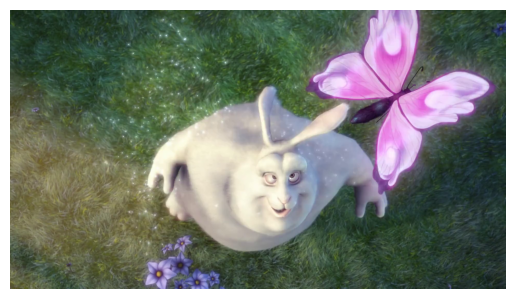

In [ ]:
# Pratica 3
# Import the necessary packages

import cv2
import matplotlib.pyplot as plt



# Load the video
cap = cv2.VideoCapture("https://github.com/leandromoreira/digital_video_introduction/raw/master/v/small_bunny_1080p_30fps.mp4")

# Read the first frame
ret, frame = cap.read()

# Convert the frame to PNG format
cv2.imwrite("frame.png", frame, [cv2.IMWRITE_PNG_COMPRESSION, 0])

# Release the video capture
cap.release()


# Load the video frame
frame = cv2.imread("frame.png")

# Convert the frame to YCbCr color space
frame_ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

# Split the channels
y, cb, cr = cv2.split(frame_ycrcb)

# Calculate the histograms
hist_y = cv2.calcHist([y], [0], None, [256], [0, 256])
hist_cb = cv2.calcHist([cb], [0], None, [256], [0, 256])
hist_cr = cv2.calcHist([cr], [0], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.plot(hist_y, color='gray')
plt.title('Y Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(132)
plt.plot(hist_cb, color='blue')
plt.title('Cb Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(133)
plt.plot(hist_cr, color='red')
plt.title('Cr Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread("frame.png")

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()



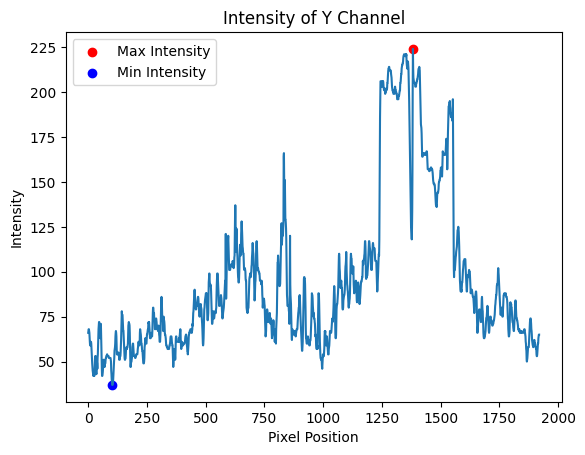

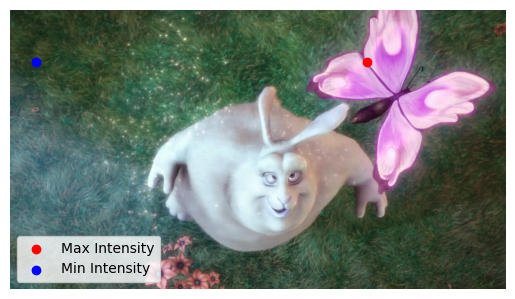

In [ ]:
#Pratica 4 - Histograma de vídeo
# Load the video
cap = cv2.VideoCapture("https://github.com/leandromoreira/digital_video_introduction/raw/master/v/small_bunny_1080p_30fps.mp4")

# Read the first frame
ret, frame = cap.read()

# Convert the frame to YCbCr color space
frame_ycrcb = cv2.cvtColor(frame, cv2.COLOR_BGR2YCrCb)

# Split the channels
y, _, _ = cv2.split(frame_ycrcb)

# Get the specific line from the Y channel
line_number = 200
line = y[line_number, :]

# Find the indices of the highest and lowest intensity values
max_index = np.argmax(line)
min_index = np.argmin(line)

# Plot the intensity values
plt.plot(line)
plt.title('Intensity of Y Channel')
plt.xlabel('Pixel Position')
plt.ylabel('Intensity')

# Mark the locations of the highest and lowest intensity values
plt.scatter(max_index, line[max_index], color='red', label='Max Intensity')
plt.scatter(min_index, line[min_index], color='blue', label='Min Intensity')
plt.legend()

plt.show()

# Release the video capture
cap.release()
# Display the frame with marked indices
plt.imshow(frame)
plt.scatter(max_index, line_number, color='red', label='Max Intensity')
plt.scatter(min_index, line_number, color='blue', label='Min Intensity')
plt.legend()
plt.axis('off')
plt.show()

